#4th Assignment

## KMP algorithm

In [ ]:
def Next(A):
    Next=[]
    Next.append(0)
    for i in range(1,len(A)-1):
        j=Next[i-1]
        flag=False
        while not flag and j!=0:
            if A[i]==A[j]:
                Next.append(j+1)
                flag=True
            else:
                j=Next[j-1]
        else:
            if not flag:
                if A[i]==A[0]:
                    Next.append(1)
                else:
                    Next.append(0)
    return Next
def KMP(S,P,Next):
    Found=False
    i,j=0,0
    n,m=len(S)-1,len(P)-1
    while not Found and n-i>=m-j:
        #print(i,j)
        if j==m:
            Found=True
            break
        elif S[i]==P[j]:
            i+=1
            j+=1

        elif S[i]!=P[j]:
            if j!=0:
                j=Next[j-1]
            i+=1
    if Found:
        print("String matched from index ", i-m, "to index ", i)
        return
    else:
        print("String not matched")
        return
# Load strings from files
with open('/content/dna.txt', 'r') as file1, open('/content/smalldna.txt', 'r') as file2:
    S = file1.read()
    P = file2.read()

if not S or not P:
    print("emtpy file")
else:
    Nex=Next(P)
    KMP(S,P,Nex)

String matched from index  89704 to index  99394


## Rabin Karp


In [ ]:
Hash1 = []

def hashTable(S1, S2):
    compare = 0
    num = 499
    print("length of s2: ",len(S2)//4)
    # S2 is string to be compared
    hash_val = 0
    for i in range(len(S2)):
        hash_val += ord(S2[i])
    hash_val = hash_val % num
    print("hash: ", hash_val)
    length = len(S2)

    for i in range(len(S1) - length + 1):
        if i == 0:
            substring_sum = 0
            for j in range(i, length):
                substring_sum += ord(S1[j])
            substring_sum = substring_sum % num
            Hash1.append(substring_sum)
        else:
            Hash1.append((Hash1[i - 1] - ord(S1[i - 1]) + ord(S1[i + length - 1])) % num)

        if Hash1[i] == hash_val:
            l = i
            matched = True
            for k in range(0, len(S2)):
                if S2[k] == S1[l]:
                    l += 1
                    compare += 1
                else:
                    matched = False
                    compare += 1
                    break
            if matched:
                return compare, "String matched from index " + str(i) + " to index " + str(i + len(S2) - 1)

    return compare, "String Not Matched"

# Load strings from files
with open('/content/dna.txt', 'r') as file1, open('/content/smalldna.txt', 'r') as file2:
    S = file1.read()
    P = file2.read()

if not S or not P:
    print("Empty file")
else:
    compare, result = hashTable(S, P)
    print("Total Comparisons:", compare)
    print(result)


length of s2:  2422
hash:  229
Total Comparisons: 9926
String matched from index 89704 to index 99394


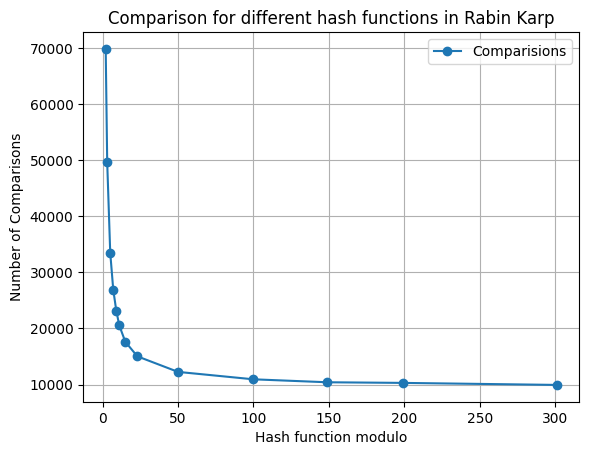

In [ ]:
import matplotlib.pyplot as plt

# Data
sizes = [2,3,5,7 ,9 ,11, 15,23,50,100,149,199,301,499]
comparisons = [69833, 49600,  33510, 26925, 23195,20538,17619,15020, 12247,10926,10399,10287,9926]


# Create the plot
#plt.figure(figsize=(10, 6))
plt.plot(sizes[:13], comparisons, marker='o', label='Comparisions')

plt.xlabel('Hash function modulo')
plt.ylabel('Number of Comparisons')
plt.title('Comparison for different hash functions in Rabin Karp')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
